# Sumário 
* gravar em um dataframe
* Utilizar uma máscara do banco de dados e
* sintetizar uma amostra
* Comparar imagem original e sintetica 
* Comparar resultados com artigo


In [1]:
import metrics as m
import cv2
from metrics import mse, dssim, lbp_tile_distance
import suport.patchesMethods as pm

In [40]:
sourcename = "2a6477aee8"  #
sinName    = "18c67696"  

In [41]:
original = f"tgs_salt\\{sourcename}.png"
sintese  = f"result\\{sinName}.jpg"

# load the two input images    0bdd44d530.png 1bd1c8c771 73be8191
imageA = cv2.imread(original,0)
imageB = cv2.imread(sintese,0)
if imageA is None or imageB is None:
    raise ValueError("Erro ao carregar as imagens. Verifique os caminhos.")


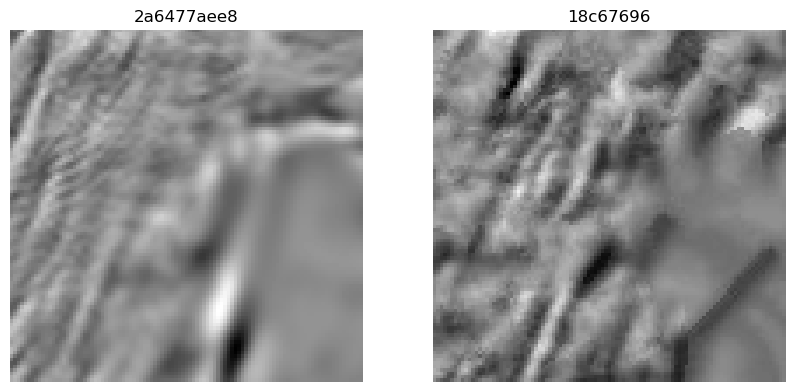

MSE        : 971.1281246936575
LBP T Dist: 0.0784029783406508
DSSIM      : 0.3736453291306366


In [42]:
images = [imageA,imageB]
titles = [sourcename, sinName]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

# compute the MSE between the two images
m = mse(imageA, imageB)
# compute the DSSIM between the two images
s = dssim(imageA, imageB)


# print(f"Old DSSIM  : {oldssim}")  # Old DSSIM is not used in the current code

# compute LBP tile distance
lbp_tile_dist = lbp_tile_distance(imageA, imageB)

print(f"MSE        : {m}")
print(f"LBP T Dist: {lbp_tile_dist}")
print(f"DSSIM      : {s}")


In [6]:
dist = lbp_tile_distance(imageA, imageB)
print(f"LBP tile distance: {dist}")


LBP tile distance: 0.0784029783406508


# Leitura de csv para comparação de imagens

In [2]:
import pandas as pd
import cv2
import numpy as np
from metrics import mse, dssim, lbp_tile_distance
import suport.patchesMethods as pm
import matplotlib.pyplot as plt
import os

In [3]:
#desenhar um bloxplot com os valores de mse, ssim e lbp_distance
def boxplot(nomeOriginal, mse_values, ssim_values, lbp_distances):
    numsamples = len(mse_values)
    #titulo da figura
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.boxplot(mse_values)
    plt.title('MSE ')
    plt.subplot(1, 3, 2)
    plt.boxplot(lbp_distances)
    plt.title('LBP Distance ')
    plt.subplot(1, 3, 3)
    plt.boxplot(ssim_values)
    plt.title('DSSIM')
    plt.suptitle(f'{nomeOriginal} - {numsamples} samples', fontsize=16)
    plt.tight_layout()

In [3]:
#calcule valores mínimos, q1, q2, mediana, q3 e máximo
def statistics(values):
    n = len(values)
    if n == 0:
        print("No values to calculate statistics.")
        return None, None, None, None, None, None
    min = np.min(values)
    q1 = np.percentile(values, 25)
    q2 = np.median(values)
    q3 = np.percentile(values, 75)
    max = np.max(values)
    mean = np.mean(values)
    print(f"   {min:.2f}, {q1:.2f}, {q2:.2f}, {q3:.2f}, {max:.2f}, {mean:.2f}")
    return n, min, q1, q2, q3, max, mean


In [47]:
# Carregar o arquivo CSV com os caminhos das imagens
df_imgs = pd.read_csv('result\\sintese.csv', sep=';' , header=None)

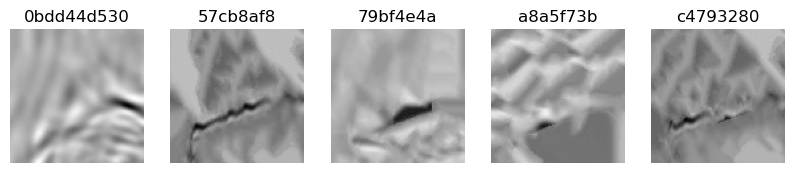

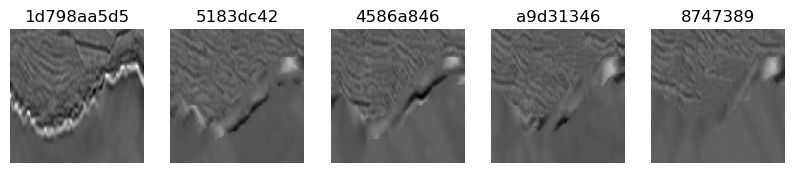

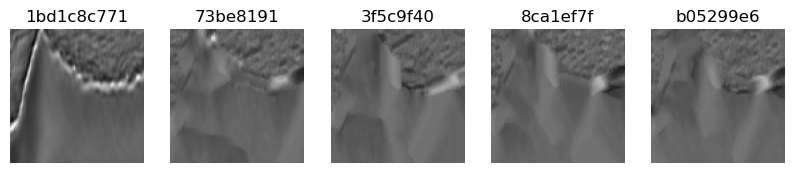

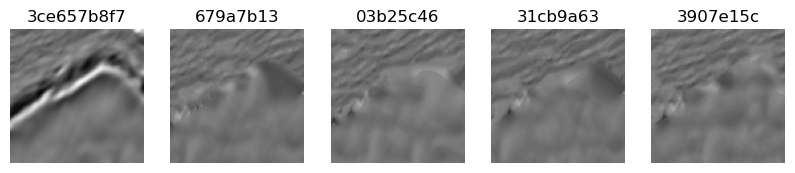

In [36]:
# mostre somente os 5 primeiros valores de cada linha df_imgs sem o numero de indice
# acrencente a extenção .png ao primeiro valor e jpg ao demais valores
# carregue com cv2.imread cada uma das imagens a partir do diretorio results e coloque na lista imgs
# verifique se a leitura foi bem sucedida
imgs = []
for i, row in df_imgs.iterrows():
    filename = f"tgs_salt/{row.iloc[0]}.png"
    if os.path.exists(filename):
        imgs.append(cv2.imread(filename))
    else:
        print(f"Arquivo não encontrado: {filename}")
    for val in row.iloc[1:5].values:
        filename = f"result/{val}.jpg"
        if os.path.exists(filename):
            imgs.append(cv2.imread(filename))
        else:
            print(f"Arquivo não encontrado: {filename}")
    pm.showImages(images=imgs, imagesTitle=row.iloc[0:5].values,size=(10,10))
    imgs = []  # Limpar a lista para a próxima iteração



In [4]:
import os
import sys
import pandas as pd


In [32]:
#liste todos arqvuios run_metrics csv na pasta result e seus subdiretorios
arquivos = []
for root, dirs, files in os.walk('result'):
    for f in files:
        if f.startswith('run_') and f.endswith('.csv'):
            arquivos.append(os.path.join(root, f))
print(arquivos)

['result\\old\\run_metrics.csv', 'result\\old\\run_metrics_e7057b15.csv', 'result\\run_0bca43f7ff\\run_metrics_4437042b.csv', 'result\\run_0c19639aeb\\run_metrics_149c3bb1.csv', 'result\\run_20250913_155213_a3ad2df0\\run_metrics_8ac7ff10.csv', 'result\\run_20250913_162222_3728be04\\run_metrics_c8bb00bd.csv', 'result\\run_20250913_190017_3eccce87\\run_metrics_1c1414c4.csv', 'result\\run_20250913_205605_b31cd115\\run_metrics_19bd129f.csv', 'result\\run_20250913_211128_835547f6\\run_metrics_440d34e4.csv', 'result\\run_2ee6e81e4b\\run_metrics_75f7ec59.csv', 'result\\run_2ee6e81e4b_1\\run_metrics_50dc01c1.csv', 'result\\run_2ee6e81e4b_2\\run_metrics_9ce11385.csv', 'result\\run_5f43816c42\\run_metrics_cc9b30a2.csv', 'result\\run_5f43816c42_1\\run_metrics_5f43816c42.csv']


In [33]:
#retire os dois primeiros da lista
arquivos = arquivos[10:12]
arquivos



['result\\run_2ee6e81e4b_1\\run_metrics_50dc01c1.csv',
 'result\\run_2ee6e81e4b_2\\run_metrics_9ce11385.csv']

In [20]:
#retire os dois ulitmos da lista
arquivos = arquivos[:-2]
arquivos

['result\\run_2ee6e81e4b\\run_metrics_9ce11385.csv']

In [21]:
# Seleciona um arquivo de métricas
# Caso já existam caminhos absolutos em 'arquivos', NÃO prefixar com 'result'.
# Se quiser pegar sempre o mais recente: ordenar por mtime.
import os, time

if not arquivos:
    raise RuntimeError("Lista 'arquivos' está vazia. Execute a célula que popula 'arquivos' antes.")

# Ordena por data de modificação (mais recente primeiro)
arquivos_ordenados = sorted(arquivos, key=lambda p: os.path.getmtime(p), reverse=True)

# Escolhe o primeiro (mais recente) ou um índice específico
indice = 0  # altere para outro índice se quiser
meuarquivo = arquivos_ordenados[indice]

# Garante que é caminho existente
if not os.path.exists(meuarquivo):
    raise FileNotFoundError(f"O arquivo {meuarquivo} não foi encontrado.")
print(f"metrics CSV selecionado: {meuarquivo}")

metrics CSV selecionado: result\run_2ee6e81e4b\run_metrics_9ce11385.csv


In [22]:
# Lê ignorando linhas de comentário (começam com #) e usando separador ponto-e-vírgula
df = pd.read_csv(meuarquivo, sep=';', comment='#')

In [13]:
# Carregar e concatenar todos os arquivos CSV em um único DataFrame
df_list = []
for arquivo in arquivos:
    df_temp = pd.read_csv(arquivo, sep=';', comment='#')
    df_list.append(df_temp)
df = pd.concat(df_list, ignore_index=True)


In [23]:
df

,iteration,output_file,time_sec,mse,dssim,lbp_distance
0,1,result\run_2ee6e81e4b\733d3436.jpg,15.372688,458.326733,0.202977,0.257707
1,2,result\run_2ee6e81e4b\6766c50e.jpg,15.198944,529.703166,0.203885,0.203326
2,3,result\run_2ee6e81e4b\c50e8c9c.jpg,15.027657,526.919322,0.203531,0.251273
3,4,result\run_2ee6e81e4b\0f6af867.jpg,15.129732,443.822861,0.197840,0.193274
4,5,result\run_2ee6e81e4b\cb3ed8fe.jpg,16.647596,574.202333,0.204363,0.264192
5,6,result\run_2ee6e81e4b\55e96a30.jpg,16.829238,439.213607,0.195158,0.216659
6,7,result\run_2ee6e81e4b\1228d172.jpg,17.049591,583.601804,0.212405,0.210862
7,8,result\run_2ee6e81e4b\e616ea2e.jpg,16.411203,472.618077,0.176693,0.258293
8,9,result\run_2ee6e81e4b\11c7297e.jpg,16.344922,515.939418,0.204461,0.202513
9,10,result\run_2ee6e81e4b\cbfd606d.jpg,15.387148,458.072542,0.194662,0.246397


In [24]:
expected_cols = ['iteration', 'output_file', 'time_sec', 'mse', 'dssim', 'lbp_distance']
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    print('Colunas presentes no arquivo:', list(df.columns))
    raise ValueError(f'Colunas esperadas ausentes: {missing}')
else:
    print('Todas as colunas esperadas estão presentes.')

Todas as colunas esperadas estão presentes.


In [25]:
# Garante tipos numéricos onde necessário
numeric_cols = ['time_sec', 'mse', 'dssim', 'lbp_distance']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [27]:
# Calcula estatísticas
stats_df = pd.DataFrame({
    'min': df[numeric_cols].min(),
    'Q1': df[numeric_cols].quantile(0.25),
    'median': df[numeric_cols].median(),
    'Q3': df[numeric_cols].quantile(0.75),
    'max': df[numeric_cols].max(),
    'mean': df[numeric_cols].mean(),
    'std': df[numeric_cols].std(),
    'count': df[numeric_cols].count()
})

print('\nEstatísticas descritivas por métrica:')
print(stats_df)



Estatísticas descritivas por métrica:
                     min          Q1      median          Q3         max  \
time_sec       14.871045   15.195804   15.486674   15.865860   18.200117   
mse           389.264092  449.302471  480.838104  530.624252  601.308009   
dssim           0.167821    0.193929    0.202580    0.212282    0.228215   
lbp_distance    0.183943    0.216902    0.241783    0.264027    0.303772   

                    mean        std  count  
time_sec       15.657115   0.693461     50  
mse           491.960690  53.205281     50  
dssim           0.201762   0.014080     50  
lbp_distance    0.240429   0.027344     50  


In [28]:
# Salva ao lado do CSV original
out_dir = os.path.dirname(meuarquivo)
out_path = os.path.join(out_dir, 'summary_stats.csv')
stats_df.to_csv(out_path, sep=';', float_format='%.6f')
print(f'Arquivo de estatísticas salvo em: {out_path}')


Arquivo de estatísticas salvo em: result\run_2ee6e81e4b\summary_stats.csv



Estatísticas descritivas para run_metrics_4437042b:
   min, Q1, median, Q3, max, mean, std, count
mse: 781.97, 812.99, 832.55, 855.79, 913.06, 836.46, 32.26, 50
dssim: 0.1964, 0.2037, 0.2090, 0.2135, 0.2264, 0.2088, 0.0065, 50
lbp_distance: 0.07, 0.11, 0.11, 0.13, 0.23, 0.12, 0.03, 50

Estatísticas descritivas para run_metrics_149c3bb1:
   min, Q1, median, Q3, max, mean, std, count
mse: 641.30, 862.15, 895.21, 1027.85, 1298.58, 936.75, 138.72, 50
dssim: 0.1965, 0.2085, 0.2159, 0.2229, 0.2404, 0.2163, 0.0109, 50
lbp_distance: 0.12, 0.15, 0.17, 0.19, 0.31, 0.18, 0.04, 50

Estatísticas descritivas para run_metrics_8ac7ff10:
   min, Q1, median, Q3, max, mean, std, count
mse: 842.59, 996.97, 1058.26, 1131.36, 1231.95, 1057.24, 100.99, 31
dssim: 0.3321, 0.3478, 0.3566, 0.3687, 0.3857, 0.3579, 0.0142, 31
lbp_distance: 0.05, 0.08, 0.09, 0.10, 0.12, 0.09, 0.02, 31

Estatísticas descritivas para run_metrics_c8bb00bd:
   min, Q1, median, Q3, max, mean, std, count
mse: 651.21, 686.99, 718.47, 740

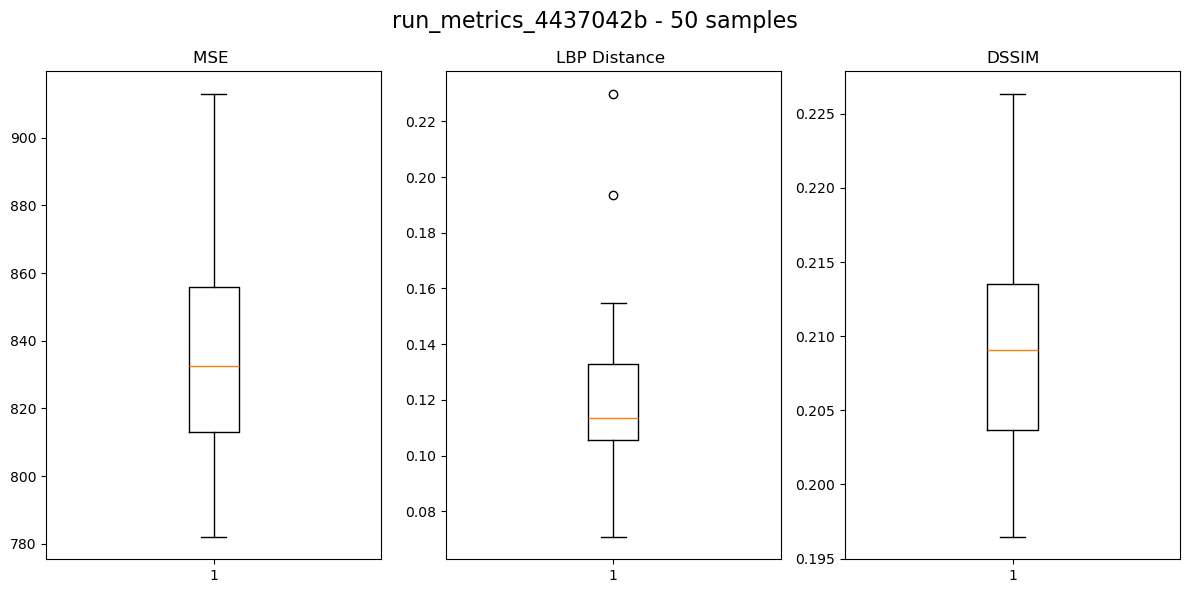

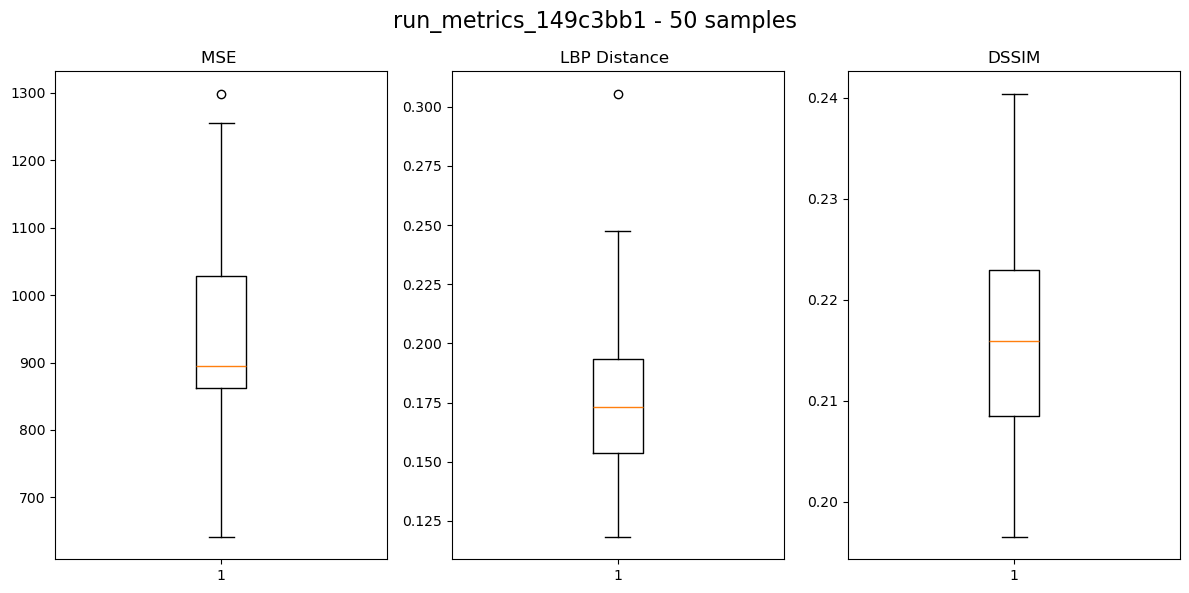

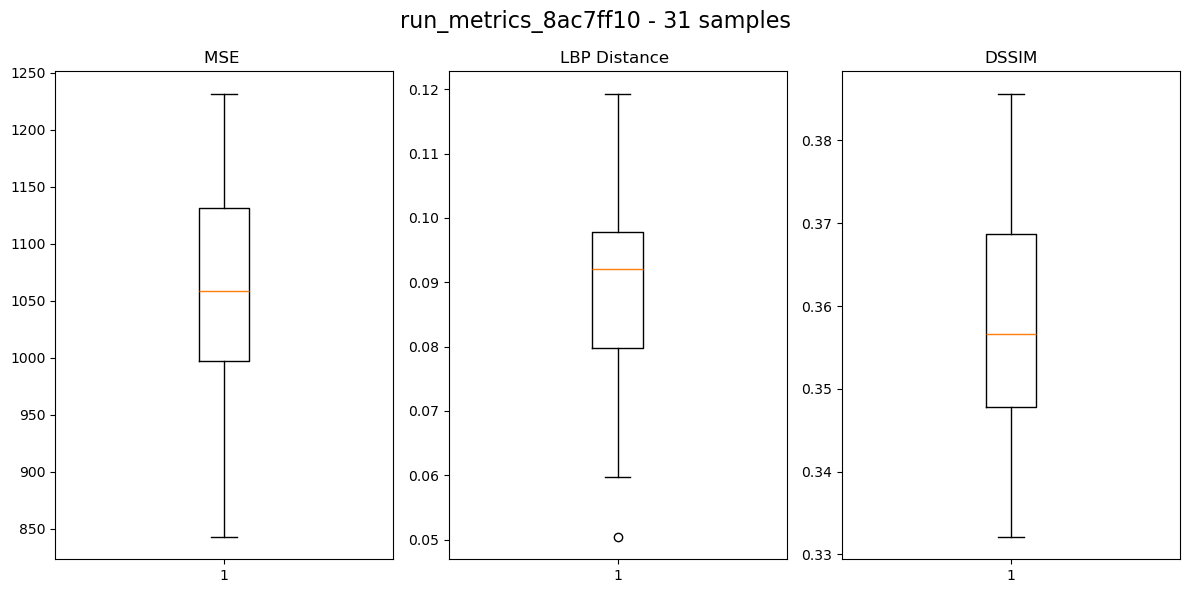

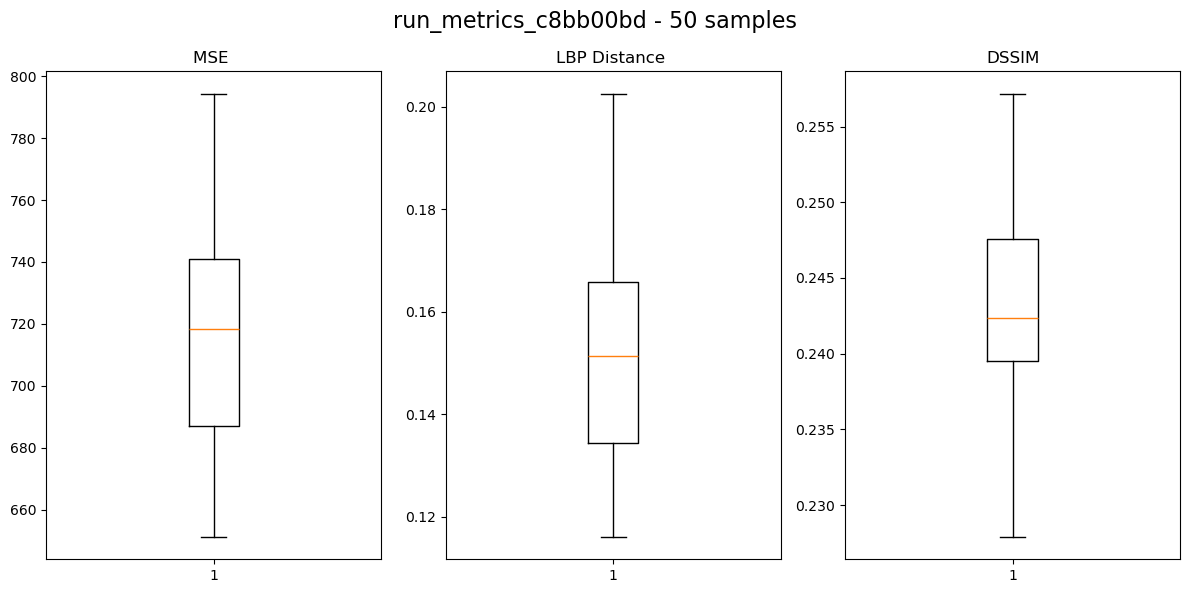

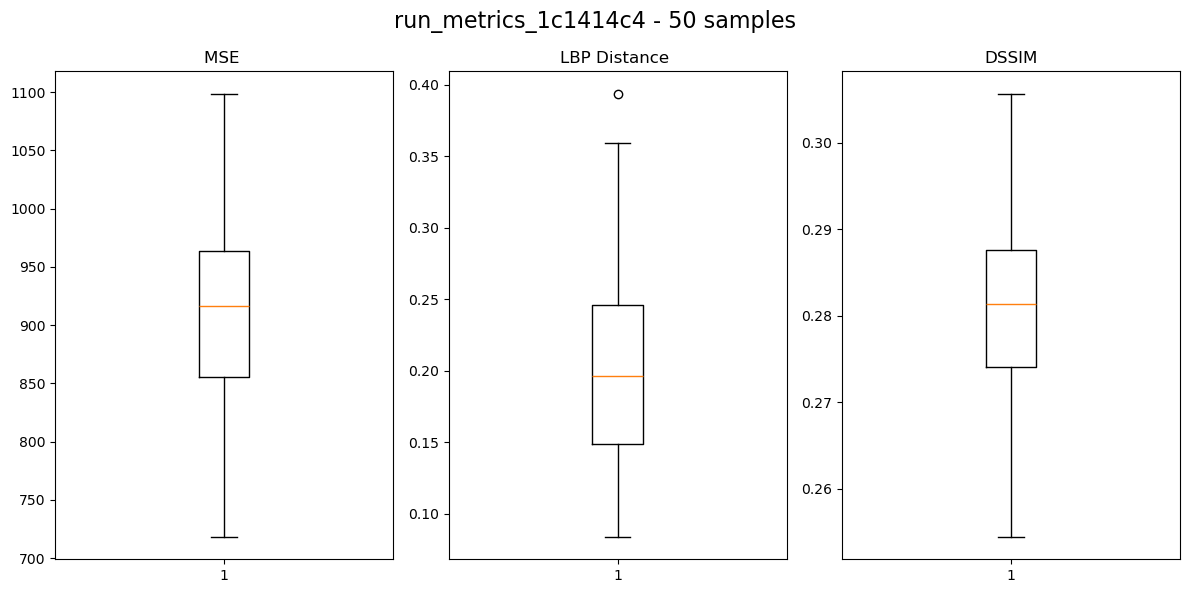

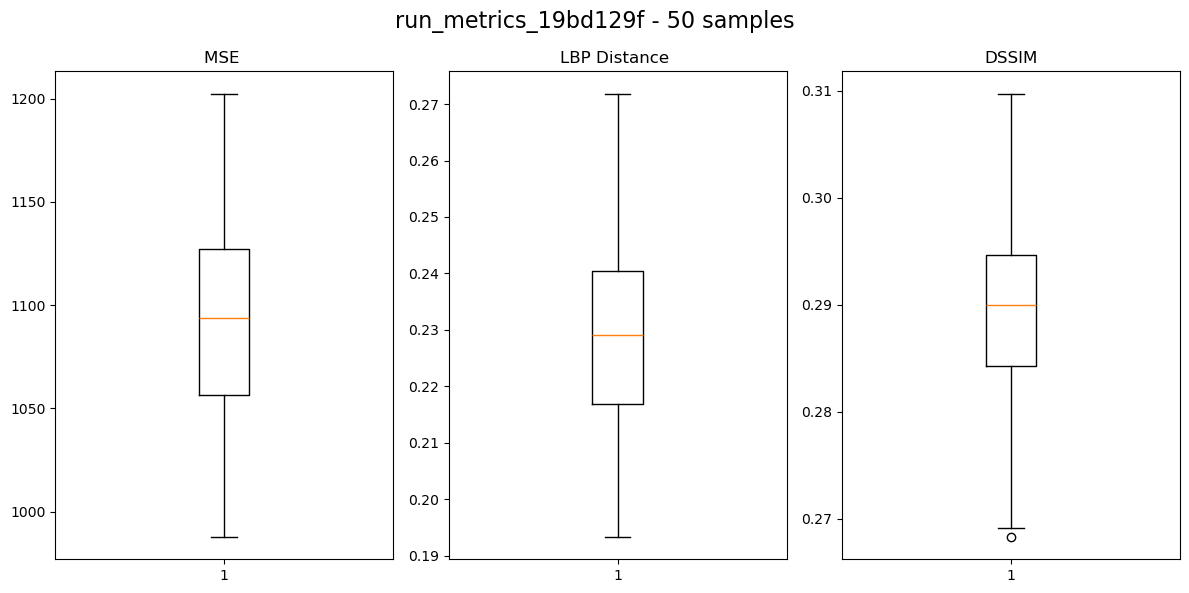

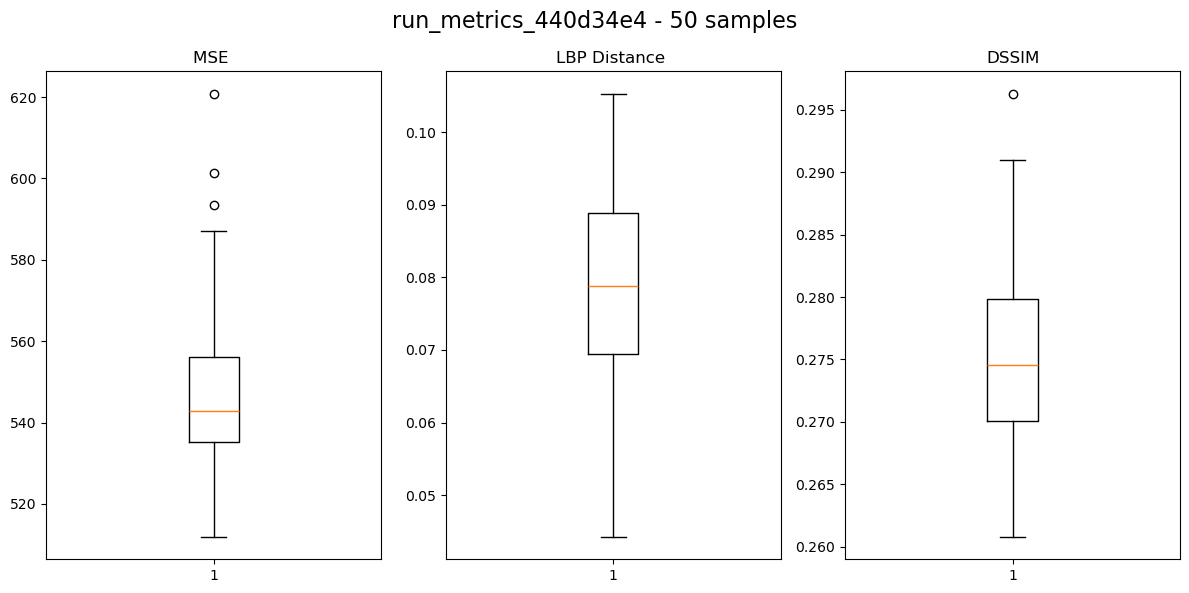

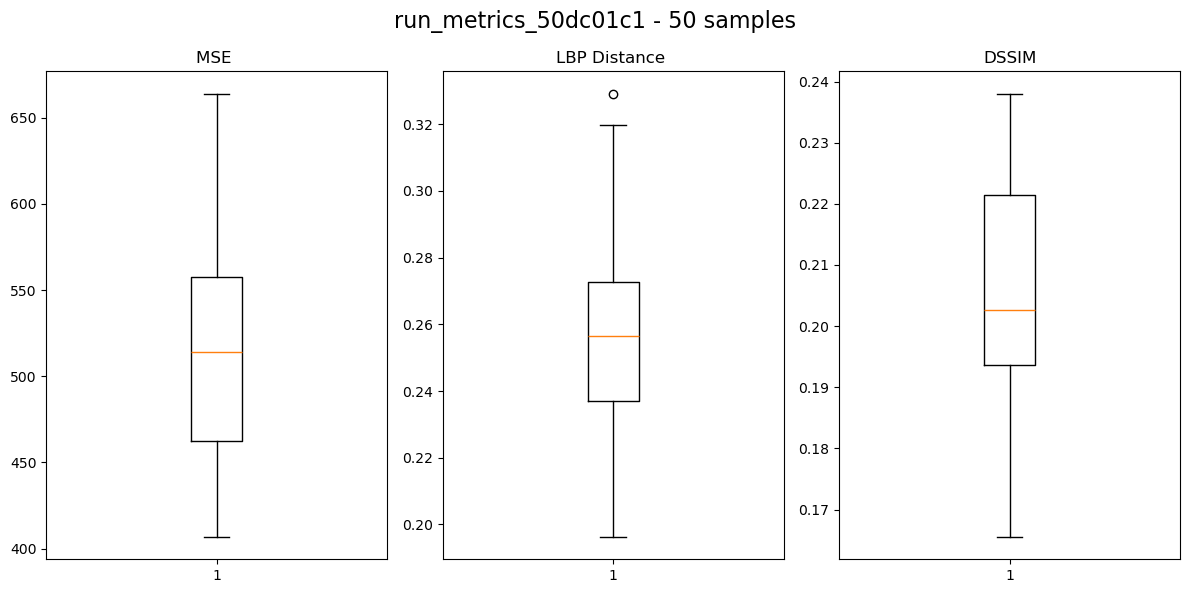

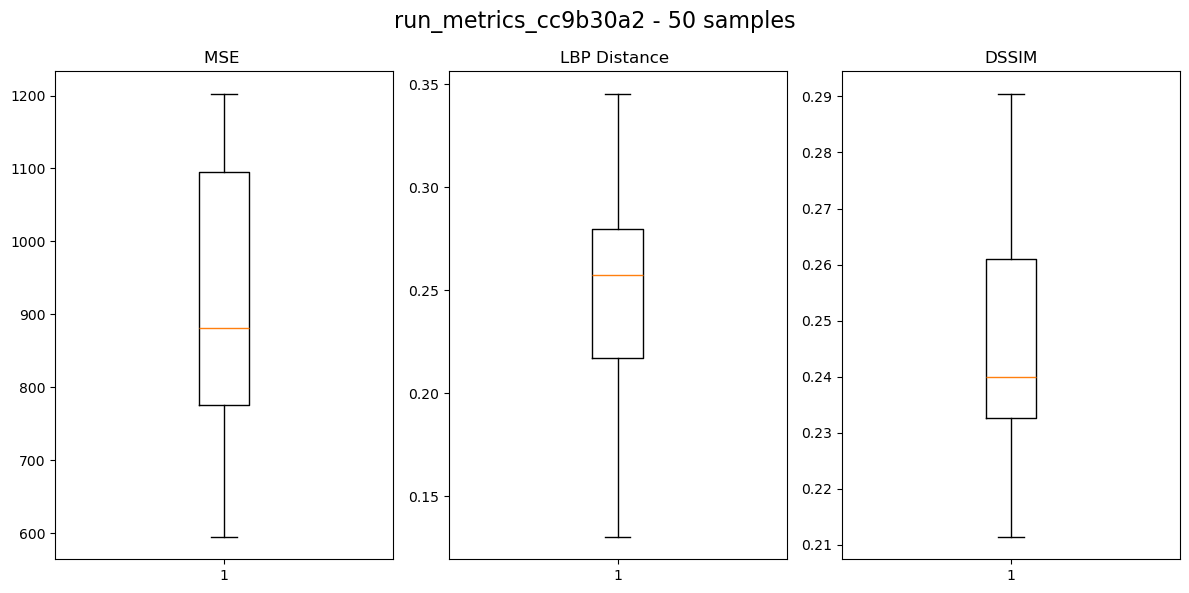

In [28]:
#criar um boxplot para cada arquivo de metrics csv na pasta result e seus subdiretorios
# salve as estatísticas em um unico arquivo csv
for arquivo in arquivos:
    df_temp = pd.read_csv(arquivo, sep=';', comment='#')
    if not all(col in df_temp.columns for col in ['mse', 'dssim', 'lbp_distance']):
        print(f"Colunas esperadas ausentes em {arquivo}. Pulando.")
        continue
    nomeOriginal = os.path.basename(arquivo).split('.')[0]
    boxplot(nomeOriginal, df_temp['mse'], df_temp['dssim'], df_temp['lbp_distance'])
    #calcula estatisticas por métrica
    print(f'\nEstatísticas descritivas para {nomeOriginal}:')
    stats = {
        'metric': ['mse', 'dssim', 'lbp_distance'],
        'min': [df_temp['mse'].min(), df_temp['dssim'].min(), df_temp['lbp_distance'].min()],
        'Q1': [df_temp['mse'].quantile(0.25), df_temp['dssim'].quantile(0.25), df_temp['lbp_distance'].quantile(0.25)],
        'median': [df_temp['mse'].median(), df_temp['dssim'].median(), df_temp['lbp_distance'].median()],
        'Q3': [df_temp['mse'].quantile(0.75), df_temp['dssim'].quantile(0.75), df_temp['lbp_distance'].quantile(0.75)],
        'max': [df_temp['mse'].max(), df_temp['dssim'].max(), df_temp['lbp_distance'].max()],
        'mean': [df_temp['mse'].mean(), df_temp['dssim'].mean(), df_temp['lbp_distance'].mean()],
        'std': [df_temp['mse'].std(), df_temp['dssim'].std(), df_temp['lbp_distance'].std()],
        'count': [df_temp['mse'].count(), df_temp['dssim'].count(), df_temp['lbp_distance'].count()]
    }
    print (f"   min, Q1, median, Q3, max, mean, std, count")
    print (f"mse: {stats['min'][0]:.2f}, {stats['Q1'][0]:.2f}, {stats['median'][0]:.2f}, {stats['Q3'][0]:.2f}, {stats['max'][0]:.2f}, {stats['mean'][0]:.2f}, {stats['std'][0]:.2f}, {stats['count'][0]}")
    print (f"dssim: {stats['min'][1]:.4f}, {stats['Q1'][1]:.4f}, {stats['median'][1]:.4f}, {stats['Q3'][1]:.4f}, {stats['max'][1]:.4f}, {stats['mean'][1]:.4f}, {stats['std'][1]:.4f}, {stats['count'][1]}")
    print (f"lbp_distance: {stats['min'][2]:.2f}, {stats['Q1'][2]:.2f}, {stats['median'][2]:.2f}, {stats['Q3'][2]:.2f}, {stats['max'][2]:.2f}, {stats['mean'][2]:.2f}, {stats['std'][2]:.2f}, {stats['count'][2]}")
    stats_df = pd.DataFrame(stats)
    out_dir = os.path.dirname(arquivo)  
    out_path = os.path.join(out_dir, f'summary_stats_{nomeOriginal}.csv')
    stats_df.to_csv(out_path, sep=';', float_format='%.6f', index=False)

In [23]:
# Agregar estatísticas de TODOS os arquivos de métricas em um único CSV
import pandas as pd, os

registros = []
for arquivo in arquivos:
    try:
        df_temp = pd.read_csv(arquivo, sep=';', comment='#')
    except Exception as e:
        print(f"Falha ao ler {arquivo}: {e}")
        continue
    # Verifica colunas essenciais
    if not all(col in df_temp.columns for col in ['mse', 'dssim', 'lbp_distance', 'iteration', 'time_sec']):
        print(f"Colunas esperadas ausentes em {arquivo}. Pulando.")
        continue
    nome_run = os.path.basename(os.path.dirname(arquivo))  # pasta run_...
    base_csv = os.path.basename(arquivo)
    # Estatísticas por métrica
    for metric in ['mse', 'dssim', 'lbp_distance', 'time_sec']:
        serie = df_temp[metric].dropna()
        if serie.empty:
            continue
        registros.append({
            'run_dir': nome_run,
            'csv_file': base_csv,
            'metric': metric,
            'min': serie.min(),
            'Q1': serie.quantile(0.25),
            'median': serie.median(),
            'Q3': serie.quantile(0.75),
            'max': serie.max(),
            'mean': serie.mean(),
            'std': serie.std(),
            'count': serie.count()
        })

if not registros:
    raise RuntimeError('Nenhuma estatística calculada. Verifique se os arquivos possuem as colunas esperadas.')

summary_all = pd.DataFrame(registros)
# Ordena para facilitar leitura
summary_all = summary_all.sort_values(by=['metric', 'run_dir']).reset_index(drop=True)

# Caminho de saída único
out_path = os.path.join('result', 'all_runs_summary_stats.csv')
summary_all.to_csv(out_path, sep=';', index=False, float_format='%.6f')
print(f'Estatísticas agregadas salvas em: {out_path}')
summary_all.head(20)

Estatísticas agregadas salvas em: result\all_runs_summary_stats.csv


,run_dir,csv_file,metric,min,Q1,median,Q3,max,mean,std,count
0,run_0bca43f7ff,run_metrics_4437042b.csv,dssim,0.196446,0.203687,0.209047,0.213503,0.226367,0.208762,0.006537,50
1,run_0c19639aeb,run_metrics_149c3bb1.csv,dssim,0.196502,0.208476,0.215942,0.222922,0.240406,0.216304,0.010884,50
2,run_20250913_155213_a3ad2df0,run_metrics_8ac7ff10.csv,dssim,0.332100,0.347850,0.356595,0.368704,0.385665,0.357852,0.014219,31
3,run_20250913_162222_3728be04,run_metrics_c8bb00bd.csv,dssim,0.227894,0.239504,0.242374,0.247543,0.257179,0.242963,0.006439,50
4,run_20250913_190017_3eccce87,run_metrics_1c1414c4.csv,dssim,0.254412,0.274087,0.281408,0.287590,0.305702,0.281439,0.011858,50
5,run_20250913_205605_b31cd115,run_metrics_19bd129f.csv,dssim,0.268266,0.284244,0.289984,0.294663,0.309754,0.289272,0.008063,50
6,run_20250913_211128_835547f6,run_metrics_440d34e4.csv,dssim,0.260763,0.270063,0.274552,0.279844,0.296307,0.275567,0.007137,50
7,run_2ee6e81e4b,run_metrics_50dc01c1.csv,dssim,0.165503,0.193576,0.202630,0.221406,0.238036,0.205568,0.018359,50
8,run_5f43816c42,run_metrics_cc9b30a2.csv,dssim,0.211394,0.232580,0.239879,0.260909,0.290510,0.245530,0.019569,50
9,run_0bca43f7ff,run_metrics_4437042b.csv,lbp_distance,0.070720,0.105450,0.113574,0.132753,0.230006,0.117037,0.028916,50
